In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from matplotlib import style
%matplotlib inline

df = pd.read_csv("gld_price_data.csv")
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [3]:
df.shape

(2290, 6)

In [4]:
df.describe

<bound method NDFrame.describe of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [5]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [20]:
df.isnull()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2285,False,False,False,False,False,False
2286,False,False,False,False,False,False
2287,False,False,False,False,False,False
2288,False,False,False,False,False,False


In [6]:
import sklearn
from sklearn import linear_model

array([[<AxesSubplot:title={'center':'SPX'}>,
        <AxesSubplot:title={'center':'GLD'}>,
        <AxesSubplot:title={'center':'USO'}>,
        <AxesSubplot:title={'center':'SLV'}>,
        <AxesSubplot:title={'center':'EUR/USD'}>]], dtype=object)

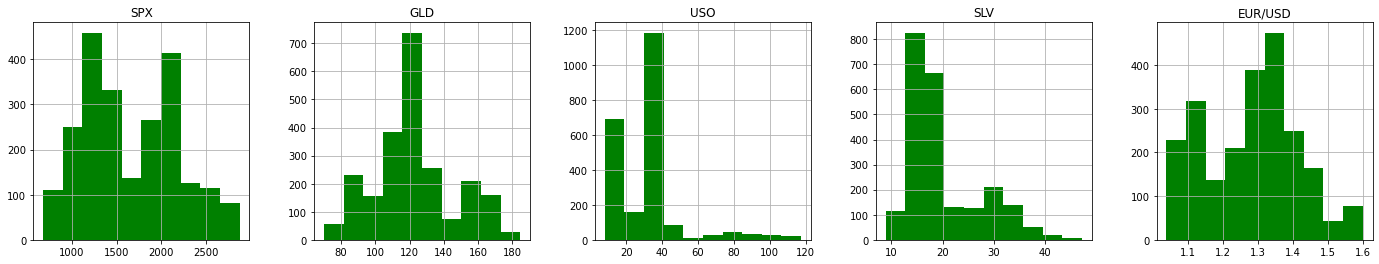

In [7]:
df.hist(figsize=(24,4), layout=(1,5), color="g")

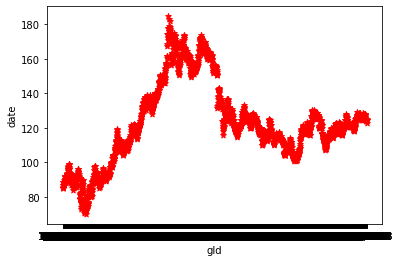

In [9]:
%matplotlib inline
plt.xlabel('gld')
plt.ylabel('date')
plt.scatter(df.Date,df['GLD'],color="red",marker="*")


In [28]:
reg=linear_model.LinearRegression()
x= df['GLD']
def new_func():
    return df['Date']

y= new_func()


In [14]:
x

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [16]:
y

0        1/2/2008
1        1/3/2008
2        1/4/2008
3        1/7/2008
4        1/8/2008
          ...    
2285     5/8/2018
2286     5/9/2018
2287    5/10/2018
2288    5/14/2018
2289    5/16/2018
Name: Date, Length: 2290, dtype: object

In [17]:
reg.fit(x,y)

ValueError: Expected 2D array, got 1D array instead:
array=[ 84.860001  85.57      85.129997 ... 125.18     124.489998 122.5438  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [23]:
new_gld= df['GLD']
new_gld_arr= new_gld.values

In [24]:
new_gld_arr.reshape(-1,1)

array([[ 84.860001],
       [ 85.57    ],
       [ 85.129997],
       ...,
       [125.18    ],
       [124.489998],
       [122.5438  ]])

In [25]:
new_date=df['Date']
new_date_arr = new_date.values

In [26]:
new_date_arr.reshape(-1,1)

array([['1/2/2008'],
       ['1/3/2008'],
       ['1/4/2008'],
       ...,
       ['5/10/2018'],
       ['5/14/2018'],
       ['5/16/2018']], dtype=object)

In [27]:
reg.fit(new_date_arr,new_gld_arr)

ValueError: could not convert string to float: '1/2/2008'